In [29]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import DepthwiseConv2D

print(os.listdir("../input"))

['fashion-mnist_test.csv', 'fashion-mnist_train.csv', 'train-images-idx3-ubyte', 't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 'train-labels-idx1-ubyte']


In [30]:
df_train = pd.read_csv('../input/fashion-mnist_train.csv')
df_test = pd.read_csv('../input/fashion-mnist_test.csv')

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [32]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [33]:
y_train = df_train['label']
X_train = df_train.drop(columns=['label'])
y_test = df_test['label']
X_test = df_test.drop(columns=['label'])

In [34]:
## Normalize
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
## One hot encode
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [36]:
## Basic info about the data
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (60000, 784)
y_train:  (60000, 10)
X_test:  (10000, 784)
y_test:  (10000, 10)


#### Thus multiclass classification problem

## Fully Connected Network

In [37]:
def model():
    model = Sequential()
    model.add(Dense(784, activation='relu', input_dim=784))
    model.add(Dense(300, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [38]:
model = model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
earlyStopper = EarlyStopping(monitor='acc', patience=1)

##### Initial trial with Densenet

In [40]:
my_hist = model.fit(x=X_train, y=y_train, batch_size=100, epochs=100, callbacks=[earlyStopper])

Epoch 1/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.4890 - acc: 0.8221
Epoch 2/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.3614 - acc: 0.8662
Epoch 3/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.3257 - acc: 0.8783
Epoch 4/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.3013 - acc: 0.8873
Epoch 5/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.2842 - acc: 0.8936
Epoch 6/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.2692 - acc: 0.8994
Epoch 7/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.2533 - acc: 0.9045
Epoch 8/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2452 - acc: 0.9075
Epoch 9/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2303 - acc: 0.9124
Epoch 10/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2231 - a

In [41]:
eval = model.evaluate(x=X_test, y=y_test, batch_size=100)

10000/10000 [==============================] - 0s 31us/step


In [42]:
eval

[0.34982181310653687, 0.9051000034809112]

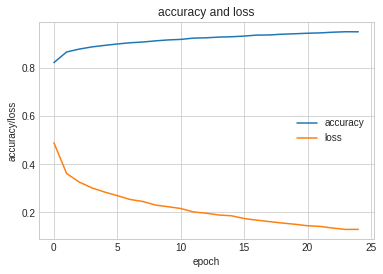

In [43]:
plt.plot(my_hist.history['acc'])
plt.plot(my_hist.history['loss'])
plt.legend(['accuracy', 'loss'], loc='right')
plt.title('accuracy and loss')
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.show()

## Standard CNN

In [44]:
X_train = X_train.reshape((X_train.shape[0], 28,28,1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [45]:
def modelCNN():
    model1 = Sequential()
    model1.add(Conv2D(5, kernel_size=[3,3], padding='valid', input_shape=(28,28,1)))
    model1.add(Conv2D(25, kernel_size=[5,5], padding='valid', activation='relu'))
    model1.add(MaxPool2D(pool_size=[3,3]))
    model1.add(Conv2D(50, kernel_size=[3,3], padding='same', activation='relu'))
#     model1.add(MaxPool2D(pool_size=[3,3]))
    model1.add(Conv2D(100, kernel_size=[3,3], padding='valid', activation='relu'))
    model1.add(Flatten())
    model1.add(Dense(1024, activation='relu'))
    model1.add(Dense(512, activation='relu'))
    model1.add(Dense(10, activation='softmax'))
    return model1

In [46]:
model1 = modelCNN()

In [47]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 25)        3150      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 25)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 50)          11300     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 100)         45100     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              2561024   
__________

In [48]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
hist = model1.fit(x=X_train, y=y_train, batch_size=100, epochs=100, callbacks=[earlyStopper])

Epoch 1/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.4912 - acc: 0.8160
Epoch 2/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.3017 - acc: 0.8893
Epoch 3/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.2536 - acc: 0.9057
Epoch 4/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.2180 - acc: 0.9202
Epoch 5/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.1930 - acc: 0.9281
Epoch 6/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.1688 - acc: 0.9371
Epoch 7/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.1456 - acc: 0.9452
Epoch 8/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.1209 - acc: 0.9544
Epoch 9/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.1018 - acc: 0.9621
Epoch 10/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.0884 

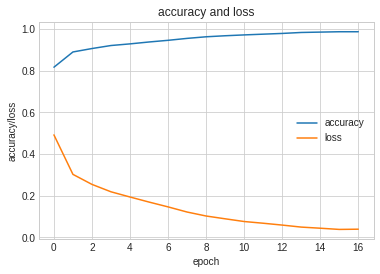

In [50]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.legend(['accuracy', 'loss'], loc='right')
plt.title('accuracy and loss')
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.show()

## Depthwise Convolution

In [51]:
def modelDepthWise():
    model2 = Sequential()
    model2.add(DepthwiseConv2D(kernel_size=[3,3], padding='valid', depth_multiplier=5, input_shape=(28,28,1)))
    model2.add(DepthwiseConv2D(kernel_size=[5,5], padding='valid', depth_multiplier=5, activation='relu'))
    model2.add(MaxPool2D(pool_size=[3,3]))
    model2.add(DepthwiseConv2D(kernel_size=[3,3], padding='same', depth_multiplier=2, activation='relu'))
    model2.add(DepthwiseConv2D(kernel_size=[3,3], padding='valid', depth_multiplier=2, activation='relu'))
    model2.add(Flatten())
    model2.add(Dense(1024, activation='relu'))
    model2.add(Dense(512, activation='relu'))
    model2.add(Dense(10, activation='softmax'))
    return model2

In [52]:
modelDepthwise = modelDepthWise()

In [53]:
modelDepthwise.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_5 (Depthwis (None, 26, 26, 5)         50        
_________________________________________________________________
depthwise_conv2d_6 (Depthwis (None, 22, 22, 25)        650       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 25)          0         
_________________________________________________________________
depthwise_conv2d_7 (Depthwis (None, 7, 7, 50)          500       
_________________________________________________________________
depthwise_conv2d_8 (Depthwis (None, 5, 5, 100)         1000      
_________________________________________________________________
flatten_4 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              2561024   
__________

In [54]:
modelDepthwise.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
hist = modelDepthwise.fit(x=X_train, y=y_train, batch_size=100, epochs=100, callbacks=[earlyStopper])

Epoch 1/100
60000/60000 [==============================] - 11s 188us/step - loss: 0.5850 - acc: 0.7828
Epoch 2/100
60000/60000 [==============================] - 10s 174us/step - loss: 0.3493 - acc: 0.8722
Epoch 3/100
60000/60000 [==============================] - 10s 173us/step - loss: 0.2967 - acc: 0.8916
Epoch 4/100
60000/60000 [==============================] - 10s 175us/step - loss: 0.2623 - acc: 0.9026
Epoch 5/100
60000/60000 [==============================] - 10s 173us/step - loss: 0.2374 - acc: 0.9110
Epoch 6/100
60000/60000 [==============================] - 10s 174us/step - loss: 0.2109 - acc: 0.9202
Epoch 7/100
60000/60000 [==============================] - 10s 174us/step - loss: 0.1908 - acc: 0.9281
Epoch 8/100
60000/60000 [==============================] - 10s 173us/step - loss: 0.1661 - acc: 0.9367
Epoch 9/100
60000/60000 [==============================] - 10s 173us/step - loss: 0.1451 - acc: 0.9455
Epoch 10/100
60000/60000 [==============================] - 10s 174us/ste

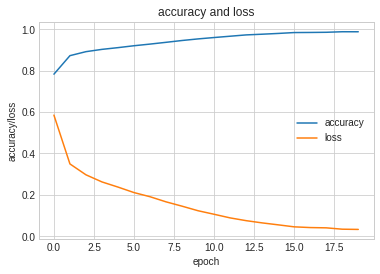

In [56]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.legend(['accuracy', 'loss'], loc='right')
plt.title('accuracy and loss')
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.show()